# SOCIOLOGIE DU BIG DATA
# TP 1

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import urllib.request

## Distribution du type de posts sur les dernier 500 posts par rapport au 2015

In [4]:
req = "https://graph.facebook.com/v3.01/me/feed/?fields=message%2Cfrom%2Creactions%2Ctype%2Cstatus_type%2Clink%2Cstory&limit=500&access_token=EAACEdEose0cBAFKfZBWbTI8JGXZBEfOZCSUcKZAELXLm8ZAMnXZA5qb3RGT2eXh2ZCCJZC7FFJahMbZCTLgyEdSoQkKg8jglAqd6ZCS0HgCl9ZAmexqw4e7gBVdJDd6lH9zRKLajILiXaS7PcLOelT1ZCnLewop2GQt7s9qZCNVssThFryADloEcApWaePGmnLms5VNsZD"
contents = urllib.request.urlopen(req)
feed = json.load(contents)

In [8]:
def pageData(data, limit):
    if 'paging' in data:        
        nexturl = data['paging']['next']
        nextcontents = urllib.request.urlopen(nexturl)
        nextjson = json.load(nextcontents)
        data['data'].extend(nextjson['data'])
        if len(data) < limit:
            pageData(nextjson, limit)
    return data
        
feed = pageData(feed, 500)

In [10]:
df = pd.DataFrame(data=feed['data'])

(823, 8)

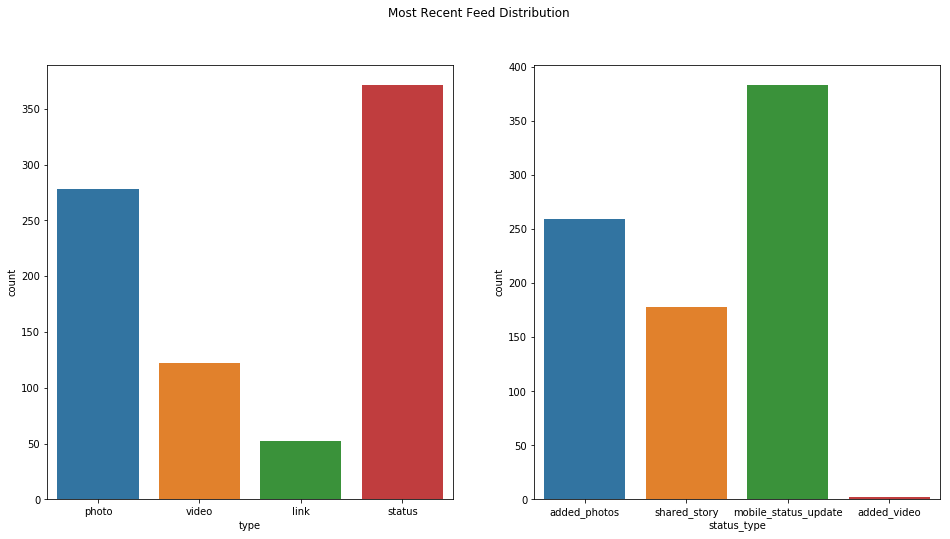

In [31]:
df = pd.DataFrame(data=feed['data'])
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Most Recent Feed Distribution')
sns.countplot(x='type', data=df, ax=ax[0])
sns.countplot(x='status_type', data=df, ax=ax[1])
plt.show()

In [18]:
reqOld =  "https://graph.facebook.com/v3.0/me/feed/?fields=message%2Cfrom%2Creactions%2Ctype%2Cstatus_type%2Clink%2Cstory&until=01-01-2015&access_token=EAACEdEose0cBAFKfZBWbTI8JGXZBEfOZCSUcKZAELXLm8ZAMnXZA5qb3RGT2eXh2ZCCJZC7FFJahMbZCTLgyEdSoQkKg8jglAqd6ZCS0HgCl9ZAmexqw4e7gBVdJDd6lH9zRKLajILiXaS7PcLOelT1ZCnLewop2GQt7s9qZCNVssThFryADloEcApWaePGmnLms5VNsZD&limit=500"
contentsOld = urllib.request.urlopen(reqOld)
feedOld = json.load(contentsOld)
feedOld = pageData(feedOld, 500)

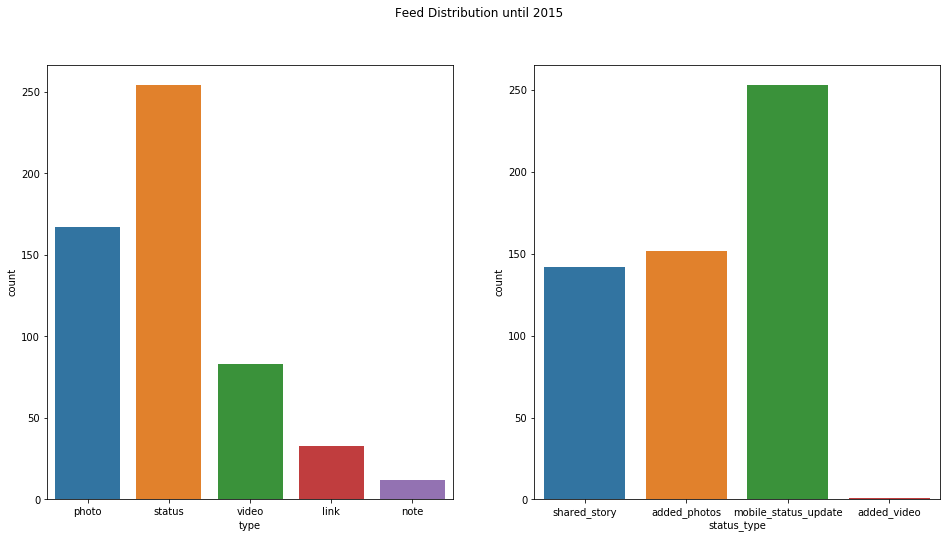

In [30]:
df_old = pd.DataFrame(data=feedOld['data'])
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Feed Distribution until 2015')
sns.countplot(x='type', data=df_old, ax=ax[0])
sns.countplot(x='status_type', data=df_old, ax=ax[1])
plt.show()

## Changes in metadata:
# COMMENT HERE

## TP 2

In [101]:
feed = []
for line in open('st.jsons', 'r', encoding='utf8'):
    feed.append(json.loads(line))

### Observer les valeurs possibles du champ type, produire un histogramme de toute les valeurs

In [102]:
status_type = {}
for item in feed:
    for t in item['type']:
        if t in status_type:
            status_type[t] += 1
        else:
            status_type[t] = 1
status_type

{'added_photos': 987,
 'added_video': 23,
 'app_created_story': 430,
 'approved_friend': 1269,
 'checkin': 20,
 'created_event': 1,
 'created_note': 5,
 'event': 11,
 'link': 2509,
 'mobile_status_update': 1226,
 'note': 1,
 'photo': 2035,
 'published_story': 77,
 'question': 18,
 'shared_story': 2035,
 'status': 9483,
 'swf': 37,
 'tagged_in_photo': 291,
 'video': 789,
 'wall_post': 1187}

,number
photo added_photos,987
status,5851
video shared_story,614
status mobile_status_update,1174
photo,329
link shared_story,1002
status wall_post,1187
link,1010
status approved_friend,1165
video,144


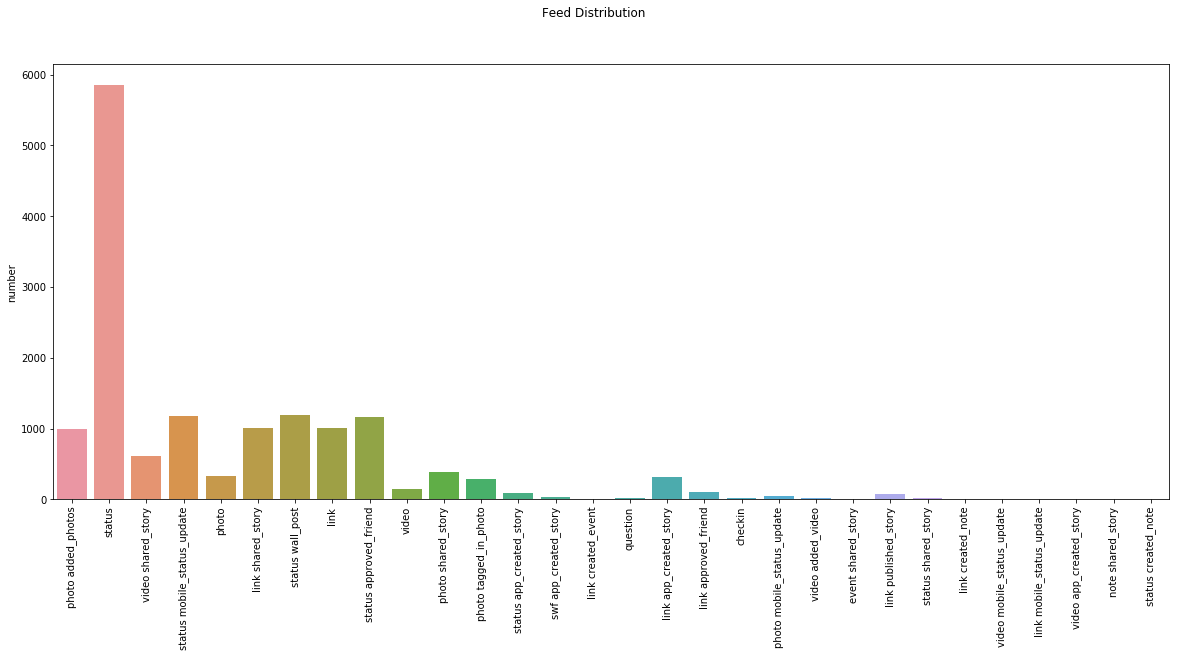

In [115]:
df = pd.DataFrame.from_dict(status_type, orient='index')
df.columns = ['number']
display(df)
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle('Feed Distribution')
sns.barplot(x=df.index.tolist(), y=df.number)
plt.xticks(rotation=90)
plt.show()

### Enumérer toutes les *combinaisons* de types de posts (puisqu'un post peut avoir plusieurs types)

In [105]:
status_type = {}
for item in feed:
        if " ".join(item['type']) in status_type:
            status_type[" ".join(item['type'])] += 1
        else:
            status_type[" ".join(item['type'])] = 1
status_type

{'checkin': 20,
 'event shared_story': 11,
 'link': 1010,
 'link app_created_story': 310,
 'link approved_friend': 104,
 'link created_event': 1,
 'link created_note': 4,
 'link mobile_status_update': 1,
 'link published_story': 77,
 'link shared_story': 1002,
 'note shared_story': 1,
 'photo': 329,
 'photo added_photos': 987,
 'photo mobile_status_update': 44,
 'photo shared_story': 384,
 'photo tagged_in_photo': 291,
 'question': 18,
 'status': 5851,
 'status app_created_story': 82,
 'status approved_friend': 1165,
 'status created_note': 1,
 'status mobile_status_update': 1174,
 'status shared_story': 23,
 'status wall_post': 1187,
 'swf app_created_story': 37,
 'video': 144,
 'video added_video': 23,
 'video app_created_story': 1,
 'video mobile_status_update': 7,
 'video shared_story': 614}

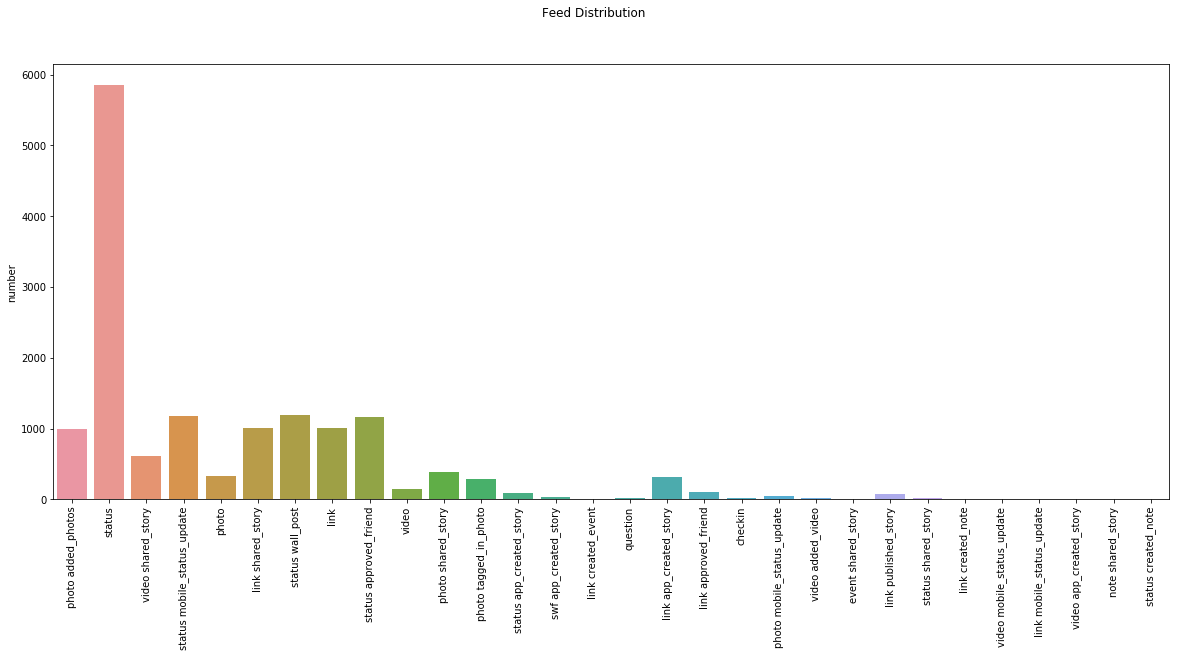

In [106]:
df = pd.DataFrame.from_dict(status_type, orient='index')
df.columns = ['number']
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle('Feed Distribution')
sns.barplot(x=df.index.tolist(), y=df.number)
plt.xticks(rotation=90)
plt.show()

### Tenter d'énumérer les valeurs possibles du champ type associées à un post contenant uniquement du texte (un "status update"), donc pas un lien. Déterminer si ces valeurs sont suffisantes pour caractériser cette catégorie de posts.

### Vérifier que le type "approved_friend" ne caractérise pas tous les posts annonçant l'apparition de nouveaux amis.

In [113]:
feed
res = []
for item in feed:
    if 'story' in item:
        if ('amis' in item['story']) & ('approved_friend' not in item['type']):
            res.append((item['story'], item['type']))
            
res

[(' 0017a959 et fe99a0c1 sont désormais amis.', ['status']), (' 0049d610 et 64194d1b sont désormais amis.', ['status']), (' 01169d52 et 7bb21869 sont désormais amis.', ['status']), (' 018eb494 et 2a93657e sont désormais amis.', ['status']), (' 01fa6f6a et 86bfc956 sont désormais amis.', ['status']), (' 0465a8e7 et 73911084 sont désormais amis.', ['status']), (' 068e87e5 et 42332f9b sont désormais amis.', ['status']), (' 06ab1593 et 802c19dc sont désormais amis.', ['status']), (' 080f8a14 et 9b0615cc sont désormais amis.', ['status']), (' 092c75ec et 7b82eafa sont désormais amis.', ['status']), (' 0ad7aa36 et 18d3bfad sont désormais amis.', ['status']), (' 0d0ff603 et c2ca258e sont désormais amis.', ['status']), (' 0d5b5500 et 64514bf9 sont désormais amis.', ['status']), (' 0e92c33e et 77e2c70e sont désormais amis.', ['status']), (' 0f88c587 et 8127ed03 sont désormais amis.', ['status']), (' 12ba3ed7 et 1784fbd6 sont désormais amis.', ['status']), (' 1419a51f et 95f6ef32 sont désormais 

In [114]:
feed

[{'created': 1380873115000,
  'from': {'id': '00149321588e4265bed767d9d27a0e4b'},
  'id': 'f77b5b2829967b51a9e6115c0a296714',
  'link': {'caption': 'Félines ;)',
   'caption-lang': 'fr',
   'link': 'https://www.facebook.com/photo.php?fbid=3450347273864&set=a.3450347153861.1073741827.1726220797&type=1&relevant_count=2',
   'link-meta': {'categories': None,
    'country': None,
    'lang': None,
    'site': 'http://facebook.com',
    'type': None},
   'picture': 'https://fbcdn-photos-a-a.akamaihd.net/hphotos-ak-frc3/t1/1383149_3450347273864_1349175095_s.jpg'},
  'story': ' 00149321 a ajouté 2 photos.',
  'story_tags': [[{'id': '00149321588e4265bed767d9d27a0e4b', 'type': 'user'}]],
  'type': ['photo', 'added_photos'],
  'updated': 1380873115000},
 {'created': 1350632940000,
  'from': {'id': '00162d5c4d48ae762d9a1e6c1774b1ff'},
  'id': '2aff449407d1f4edffdb2d81082a3911',
  'link': {'link': 'https://www.facebook.com/photo.php?fbid=483057275059415&set=a.483057091726100.112525.100000654400415